# Data Preprocessing

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#Load the dataset
df = pd.read_csv('survey.csv')

#display all columns
pd.set_option('display.max_columns', None)

#show the first 5 rows of the dataset
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
#show general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

*Note: As we can observe from the data information, all the columns except for 'Age' are categorical variables. This makes it unfeasible to perform correlation analysis or plotting a correlation heatmap. Having mostly categorical columns, makes correlation values undefined, which means a blank plot if plotted.*

In [4]:
#Check for missing values for each column/variable
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
#describe the numerical age column
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [6]:
#drop timestamp variable
df = df.drop(columns=['comments', 'Timestamp', 'state', 'no_employees', 'anonymity'])

*Note: As we can observe from the general information of the dataset, there are 27 columns, having most of the variables as categorical vairables. We might not not need some of them for the project. Therefore, we proceed to remove them. The columns are: 'TimeStamp' and 'Comments'.*

*The 'Timestamp', 'no_employees', 'anonymity' columns are being removed since it is irrelevant in this use case.*

*There are missing values in columns like 'state', 'self_employed', 'work_interfere', and 'Comments'.*

*There are missing values (41%) in the 'state' column due to the fact that it only shows the state only for participants who answered 'United States' for the country variable. Therefore, we remove the 'state column since we can visualize the survey insights by referring to the 'Country' variable.*

*The 'self_employed' variable has a few missing values (1.4%), we proceed to replace the missing values with the mode or most frequent answer, that is either 'yes' or 'no'.*

*The 'Comments' column is being removed due to highly missing values/comments for 87% of the data (1095 rows).*

*Moreover, we can also observe that the 'Age' column contains some extreme values like a maximum of 1e+11 and minimum of -1726, where it needs cleaning. Therefore, we proceed to keep only the reasonable range of age from 18 to 100.*

In [7]:
#verify the unique values and count of the self employed column, including nulls
df['self_employed'].value_counts(dropna=False)

self_employed
No     1095
Yes     146
NaN      18
Name: count, dtype: int64

In [8]:
#fill the null values of the self employed column with 'No'
df['self_employed'] = df['self_employed'].fillna('No')

#verify unique values of the column
df['self_employed'].value_counts(dropna=False)

self_employed
No     1113
Yes     146
Name: count, dtype: int64

*Note: As we can observe, the 'self_employed' column's missing values are being replaced with 'No' since it has the majority of the count (mode).*

In [9]:
#clean the age column by keeping the reasonable range of age from 18 to 100
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

In [10]:
#updated information on dataset
df.info()

#updated age filter on dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 0 to 1258
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1251 non-null   int64 
 1   Gender                     1251 non-null   object
 2   Country                    1251 non-null   object
 3   self_employed              1251 non-null   object
 4   family_history             1251 non-null   object
 5   treatment                  1251 non-null   object
 6   work_interfere             989 non-null    object
 7   remote_work                1251 non-null   object
 8   tech_company               1251 non-null   object
 9   benefits                   1251 non-null   object
 10  care_options               1251 non-null   object
 11  wellness_program           1251 non-null   object
 12  seek_help                  1251 non-null   object
 13  leave                      1251 non-null   object
 14  mental_health

,Age
count,1251.000000
mean,32.076739
std,7.288272
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


*Note: As we can observe, the irrelevant columns are being removed and the 'Age' variable is being filtered to keep only the range of reasonable age from 18 to 100. However, the maximum age is 72, with a 75% of participants aging around 36 years old.*

*Now we proceed to modify the 'Gender' variable. As we can observe from the first five rows shown earlier, there are different answers besides 'female' and 'male'. That is, some participants of the survey answered 'M', 'F', 'woman', 'men', etc. Therefore, we need to unify and fix the 'Gender' variable into 'female', 'male', and 'other'.*

In [11]:
#verify distinct gender values
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [12]:
#Function to clean the gender variable into 'female', 'male', and 'other'
def clean_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['male', 'm', 'cis male', 'male (cis)', 'man', 'mail', 'cis man', 'malr', 'make', 'maile']:
        return 'Male'
    elif gender in ['female', 'f', 'cis female', 'woman', 'female (cis)', 'cis-female/femme', 'femake', 'femail', 'female ', 'trans female']:
        return 'Female'
    else:
        return 'Other'

# Apply the cleaning function
df['Gender'] = df['Gender'].apply(clean_gender)

#verify the results
df['Gender'].value_counts()


Gender
Male      983
Female    247
Other      21
Name: count, dtype: int64

*Note: Now we have classified the 'Gender' variable into 'Male', 'Female', and 'Other', which will be easier to visualize insights later in the EDA.*

*We proceed to check if there are duplicated rows and remove them accordingly.*

In [13]:
#check if there are duplicates
duplicated_rows = df[df.duplicated()]
print("Number of duplicated rows:", len(duplicated_rows))

Number of duplicated rows: 4


In [14]:
#remove duplicated rows
df = df.drop_duplicates()

#verify the results
duplicated_rows = df[df.duplicated()]
print("Number of duplicated rows:", len(duplicated_rows))

Number of duplicated rows: 0


*Note: As we have finalized the preprocessing steps, we will now proceed to the EDA stage.*

# EDA

In [15]:
#set up a clean style
sns.set(style='whitegrid')

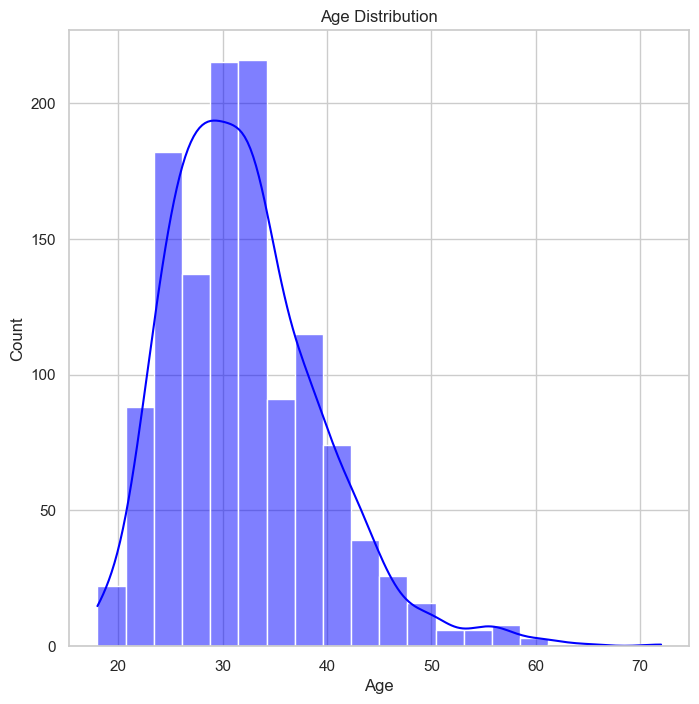

In [16]:
#Age distribution
plt.figure(figsize=(8, 8))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

*Note: As we can observe from the distribution plot, most respondents are between 20 to 40 years old and the distribution is slightly right-skewed.*

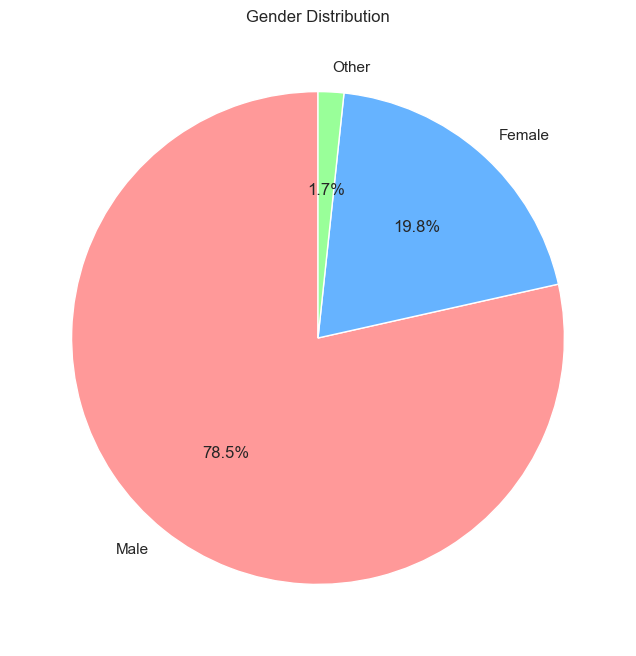

In [17]:
#pie chart for gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Gender Distribution')
plt.show()

*Note: around 79% of the participants are male.*

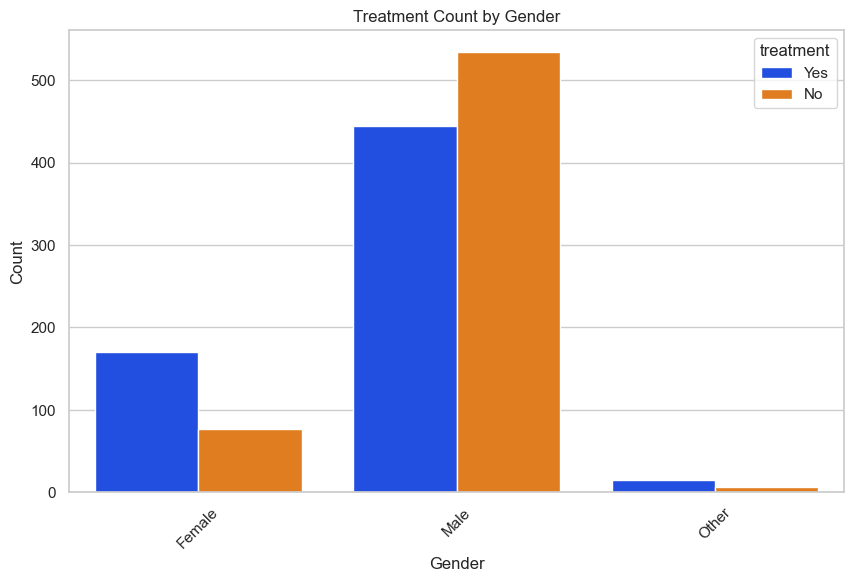

In [18]:
#Gender vs Treatment plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='treatment', data=df, palette='bright')
plt.title('Treatment Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

*Note: Males are the majority of the respondents that has sought treatment for mental health.*

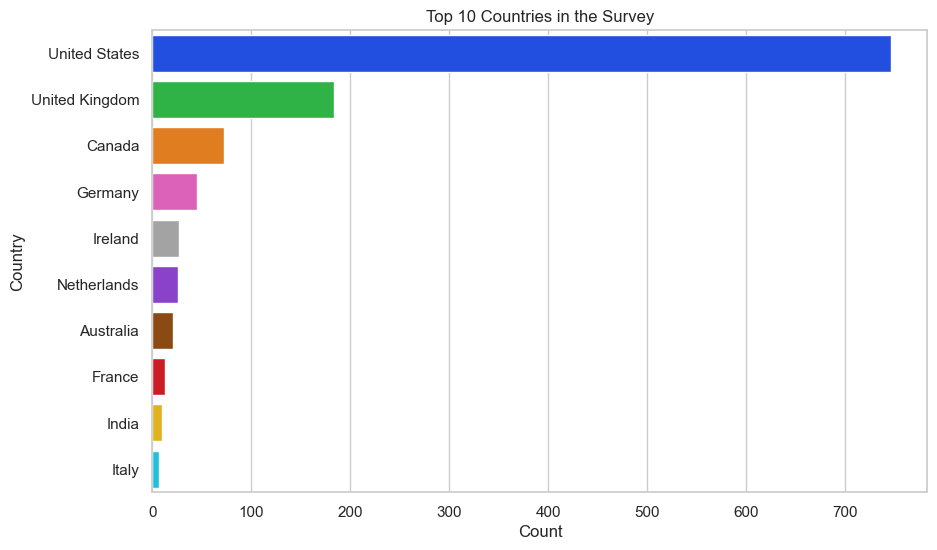

In [19]:
#Top 10 country distribution plot
top_countries = df['Country'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Country'].isin(top_countries)], y='Country', order=top_countries, palette='bright', hue='Country')
plt.title('Top 10 Countries in the Survey')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

*Note: The majority of the participants comes from the United States followed by the UK and Canada.*

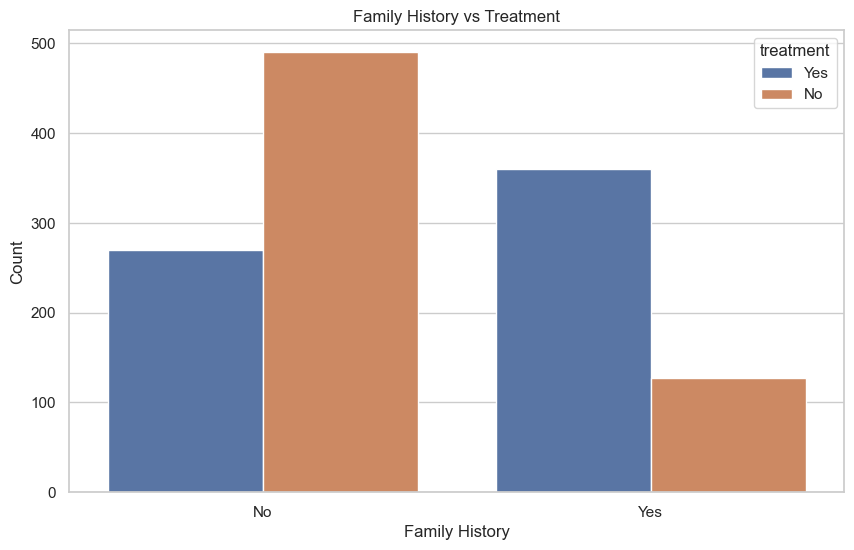

In [20]:
#family history vs treatment plot
plt.figure(figsize=(10, 6))
sns.countplot(x='family_history', hue='treatment', data=df)
plt.xlabel('Family History')
plt.ylabel('Count')
plt.title('Family History vs Treatment')
plt.show()

*Note: Those respondents with a family history of mental illness are significantly more likely to seek treatment.*

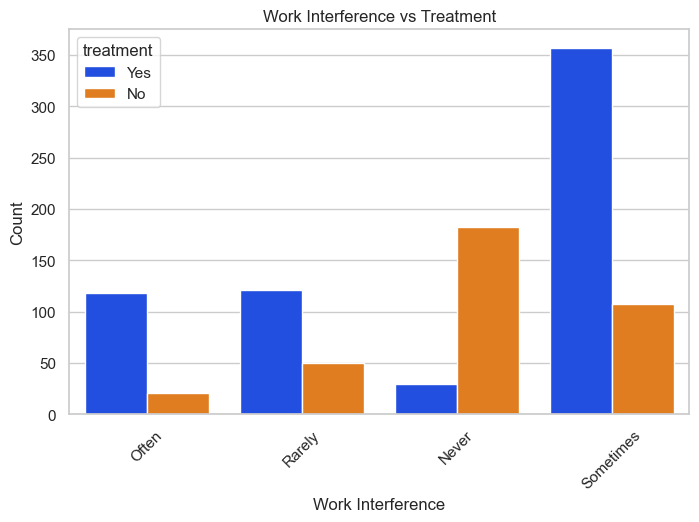

In [21]:
# work interfere vs treatment plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='work_interfere', hue='treatment', palette="bright")
plt.title('Work Interference vs Treatment')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

*Note: Participants who report that mental health 'often' or 'sometimes' interferes with work are more likely to seek treatment.*

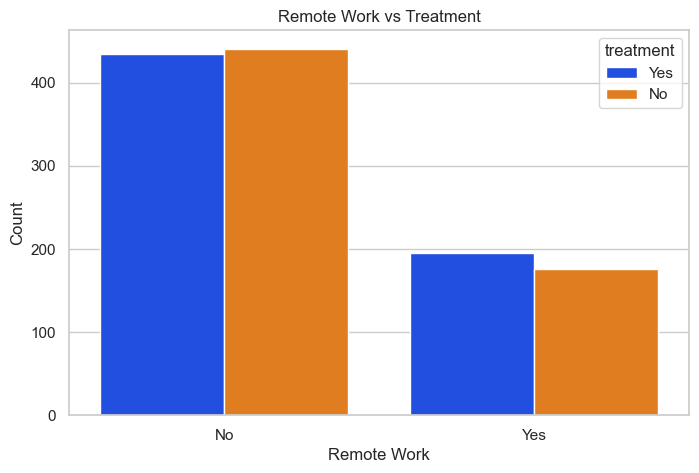

In [22]:
#remote work vs treatment plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='remote_work', hue='treatment', palette="bright")
plt.title('Remote Work vs Treatment')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.show()

*Note: treatment rates are relatively similar between those respondents who work remotely and those who do not.*

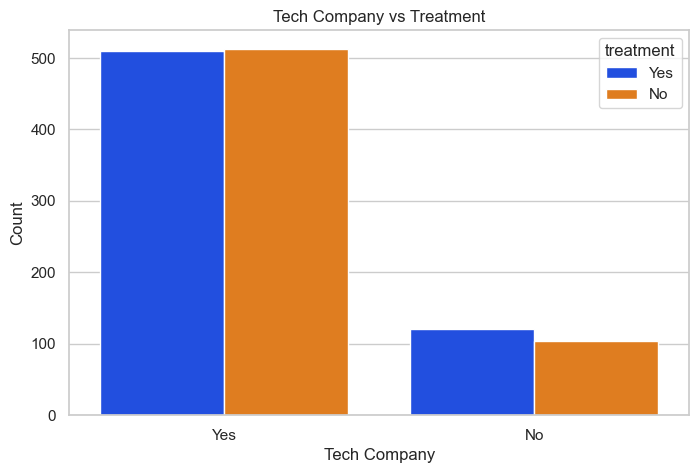

In [23]:
#tech company vs treatment plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='tech_company', hue='treatment', palette="bright")
plt.title('Tech Company vs Treatment')
plt.xlabel('Tech Company')
plt.ylabel('Count')
plt.show()

*Note: it demonstrates that there are slightly more people in tech companies that sought treatment, but the difference is not huge.*

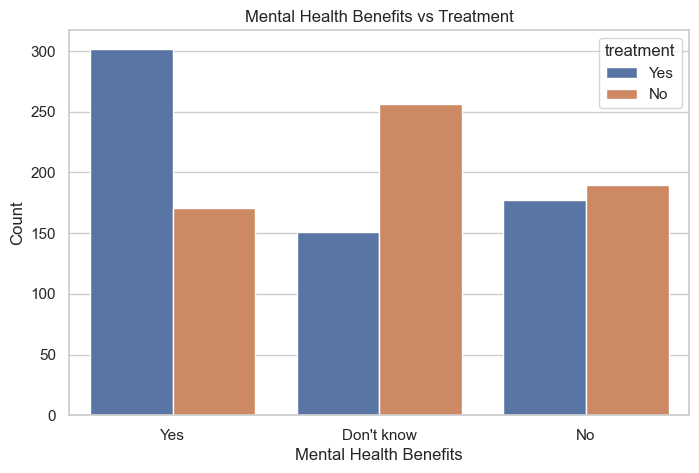

In [24]:
#benefits vs treatment plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='benefits', hue='treatment')
plt.title('Mental Health Benefits vs Treatment')
plt.xlabel('Mental Health Benefits')
plt.ylabel('Count')
plt.show()

*Note: Those respondents who do not have mental health benefits are mroe likely to seek treatment and the uncertainty about the benefits (those who responded 'dont know') seems to correlate with the lower treatment rates.*

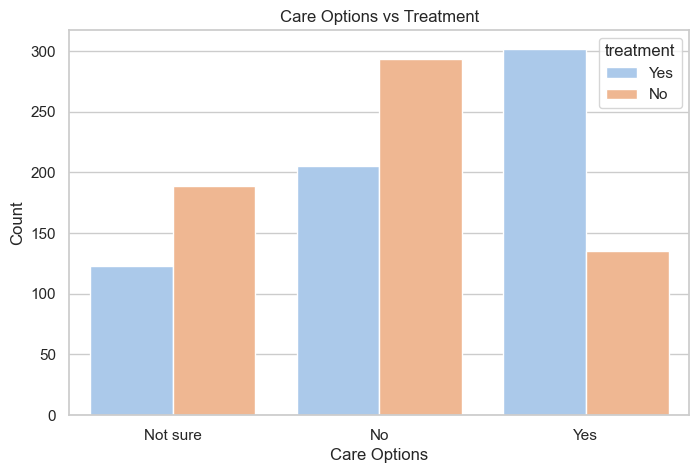

In [25]:
#care options vs treatment plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='care_options', hue='treatment', palette='pastel')
plt.title('Care Options vs Treatment')
plt.xlabel('Care Options')
plt.ylabel('Count')
plt.show()

*Note: This plot shows that the access to care options strongly correlates with treatment. That is, respondents who reported having care options are much more likely to have sought treatment.*

In [26]:
# Function to create count plots for categorical columns vs treatment
def plot_vs_treatment(column, figsize=(6, 6)):
    plt.figure(figsize=figsize)
    sns.countplot(data=df, x=column, hue='treatment')
    plt.title(f'{column.replace("_", " ").title()} vs Treatment')
    plt.tight_layout()
    plt.show()

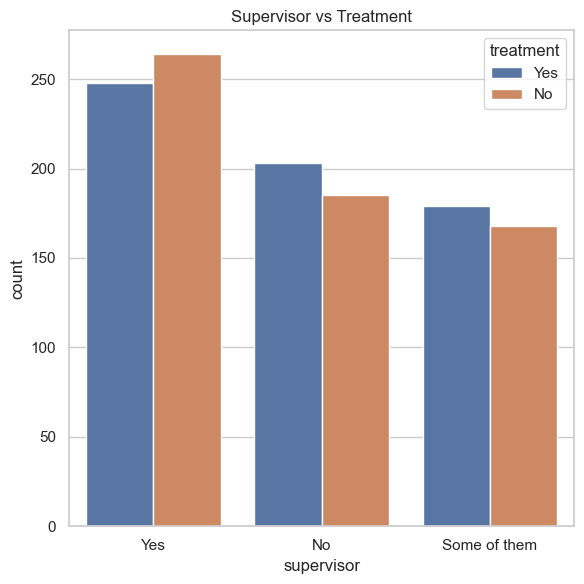

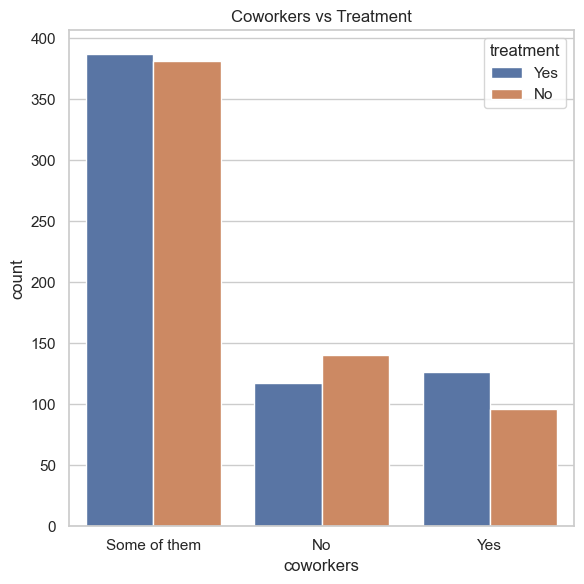

In [27]:
# supervisor and coworker vs treatment plots
eda_columns = ['supervisor', 'coworkers']

# Generate plots
for col in eda_columns:
    plot_vs_treatment(col)

*Note: Respondents with supportive supervisors and coworkers are more likely to seek treatment.*

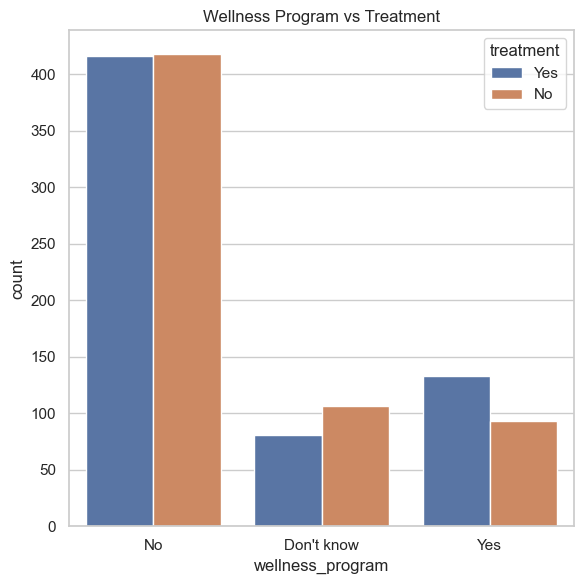

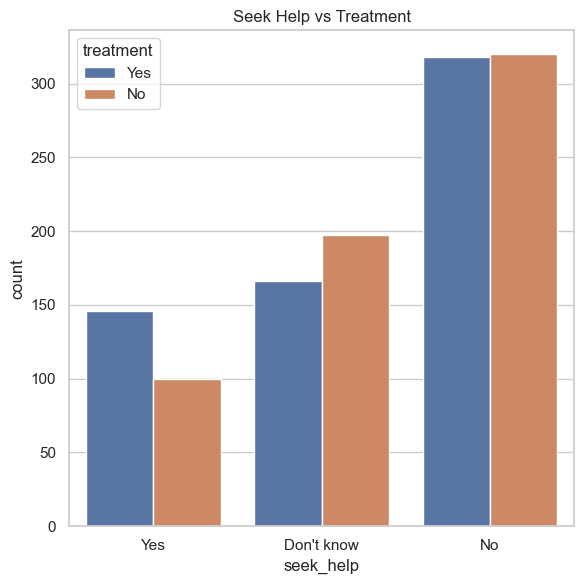

In [28]:
# wellness programs & help seeking vs treatment plots
eda_columns = ['wellness_program', 'seek_help']

# Generate plots
for col in eda_columns:
    plot_vs_treatment(col)

*Note: the presence of wellness programs and encouragement to seek help are correlated with higher treatment rates.*

*Note: Now we proceed to add histograms to gain insights from predictor imbalances. Before encoding the variables, we will proceed to loop through all categorical predictors and insert plots to visualize class imbalances (if any)*.

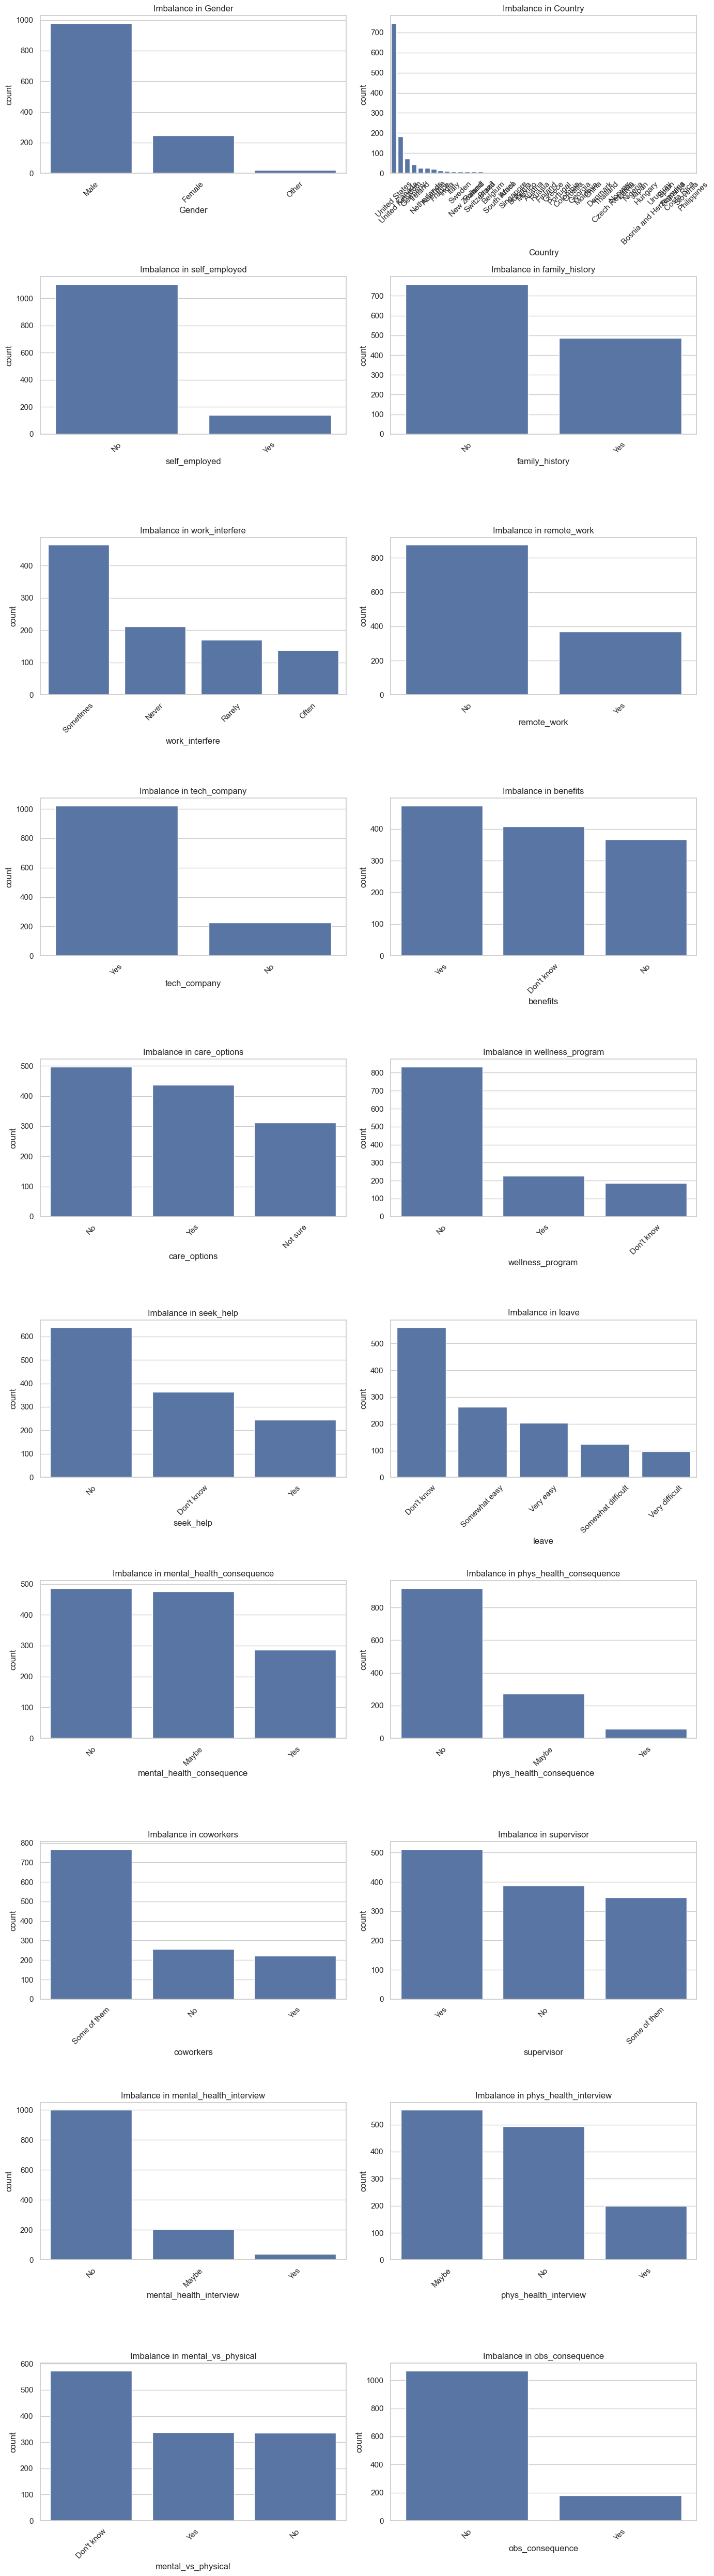

In [29]:
#show imbalance plots for categorical predictors before encoding
#exclude target variable 'treatment'
categorical_cols = df.select_dtypes(include='object').columns.drop('treatment')

n = len(categorical_cols)
n_cols = 2
n_rows = (n + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Imbalance in {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


*Note: As we can observe from the histograms, it guides us in feature selection when modeling and these are the insights:*

*1. Gender: highly imbalanced with around 80% of male respondents and around 20% of female respondents.*

*2. Country: skewed only dominated by having US, UK, and Canada respondents, limiting generalizability.*

*3. Self Employed: Around 90% responding 'No', meaning that job structure might not significantly vary across the respondents.*

*4. Family History: Moderate imbalance showing that slightly more poeple without family history of having mental illness. However, there are enough variation for modeling purposes.*

*5. Work Interference: Relatively balanced, showing it as a good feature with potential predictive power.*

*6. Remote work: skewed towards aroung 80% 'No'. Meaning that there is limited remote work adoption in the sample.*

*7. Tech company: Strong imbalance towards 'No'.*

*8. Supervisor and Coworker support: most people report having some level of support, it has decent spread, which is good for modeling.*

*9. Benefits: Fairly balanced, which is a valuable variable to explore treatment behavior.*

*10. Care options: balanced, making it a potentially strong feature.*

*11. Wellness programs and Seek help policy: Both highly imbalanced, having large majority reporting no programs and most companies have no policy or employees are unaware. This demonstrates that there is lack of mental health infrastructure in workplaces reported and could influence mental health treatment behavior.*

*12. Mental and physical health consequences: strongly skewed towards 'No', meaning that most do not perceive any work related consequences for disclosing tehir mental or physical health issues.*

*13. Observed consequences: Skewed towards 'No', suggesting that stigma may not be commonly observed. But it could also be unnoticed or unreported.*

*14. Mental health interview: extremely skewed having almost all respondents saying 'No', meaning that there could be discomfort around disclosing mental health concerns in the hiring context.*

*15. Physical health interview: balanced, indicates greater comfort when discussing physical health in interviews.*

*16. Mental vs Physical health: balanced. Many respondents see mental health as equally important as physical health. *

*17. Leave policy: moderate imbalance having 'dont know' as the most frequent response. This tells us that there could be communication gap or a lack of formal policies.*

*Note: After finalizing the EDA, we proceed to handle the categorical variables by encoding them after the EDA and before the modeling phase. It will be much easier to analyze and visualize the categorical variables in their original form rather as an encoded vector. The way we are handling the categorical variables is based on the unique value counts. That is, applying one-hot encoding if the number of unique values in a variable is less than or equal to 5. And, applying label encoding if the number of unique values in a variable is more than 5.*

In [30]:
#encoding logic
df_encoded = df.copy()
label_encoder = LabelEncoder()

for col in df_encoded.select_dtypes(include='object').columns:
    # skip target
    if col == 'treatment':
        continue
    unique_vals = df_encoded[col].nunique()
    if unique_vals <= 5:
        dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True, dtype=int)
        df_encoded = pd.concat([df_encoded.drop(columns=[col]), dummies], axis=1)
    else:
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])


In [34]:
#show the shape of the encoded dataset
print(df_encoded.shape)

(1247, 39)


In [32]:
#first rows of the encoded dataset
df_encoded.head()

,Age,Country,treatment,Gender_Male,Gender_Other,self_employed_Yes,family_history_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,remote_work_Yes,tech_company_Yes,benefits_No,benefits_Yes,care_options_Not sure,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,37,44,Yes,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0
1,44,44,No,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,32,6,No,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0
3,31,43,Yes,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1
4,31,44,No,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0


In [33]:
#save encoded dataset as csv
df_encoded.to_csv('survey_encoded_v2.csv', index=False)